In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


# DATA OVERVIEW

In [2]:
df_train=pd.read_csv("churn-bigml-80.csv")
df_test=pd.read_csv("churn-bigml-20.csv")

In [3]:
df_train.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2612,DC,130,510,No,No,0,132.4,81,22.51,200.3,110,17.03,202.5,103,9.11,6.0,1,1.62,2,False
289,ME,31,415,No,No,0,166.1,105,28.24,79.3,93,6.74,213.7,98,9.62,12.7,2,3.43,1,False
1356,NV,96,408,No,No,0,197.7,68,33.61,250.5,53,21.29,181.2,67,8.15,10.5,3,2.84,3,False
2542,TX,201,415,No,No,0,225.9,110,38.40,299.1,86,25.42,251.3,81,11.31,11.2,4,3.02,1,True
1653,MI,91,408,No,No,0,134.7,116,22.90,295.3,98,25.10,195.5,121,8.80,6.6,5,1.78,2,False
1973,NM,118,510,No,No,0,205.2,115,34.88,184.8,137,15.71,176.1,115,7.92,7.0,6,1.89,0,False
1085,IL,58,415,Yes,Yes,43,142.8,96,24.28,272.3,100,23.15,193.4,105,8.70,8.9,4,2.40,1,False
784,NV,178,408,No,No,0,275.4,150,46.82,187.5,62,15.94,147.1,126,6.62,13.6,3,3.67,1,False
899,CO,157,415,No,No,0,196.0,74,33.32,213.4,96,18.14,196.8,81,8.86,7.9,6,2.13,1,False
619,NJ,24,408,No,No,0,265.6,86,45.15,208.8,102,17.75,182.5,105,8.21,11.1,6,3.00,2,True


In [4]:
df_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df_test.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
294,NJ,45,510,No,No,0,155.7,110,26.47,260.3,103,22.13,192.2,98,8.65,11.0,1,2.97,1,False
140,LA,43,415,No,No,0,241.9,101,41.12,129.4,121,11.00,264.8,104,11.92,5.9,3,1.59,1,False
382,TX,120,415,No,No,0,203.3,108,34.56,259.9,66,22.09,115.9,103,5.22,7.8,2,2.11,3,False
55,SD,145,408,No,Yes,24,147.5,90,25.08,175.7,108,14.93,252.1,102,11.34,15.6,3,4.21,2,False
145,ME,176,415,No,No,0,223.2,76,37.94,214.4,131,18.22,154.4,80,6.95,10.1,2,2.73,3,False
648,KS,101,415,No,No,0,231.3,87,39.32,224.7,88,19.10,214.6,69,9.66,7.2,7,1.94,1,False
602,DC,70,415,No,No,0,152.8,145,25.98,183.6,102,15.61,151.8,75,6.83,10.5,2,2.84,1,False
265,ID,56,510,No,No,0,150.9,79,25.65,161.8,87,13.75,167.7,115,7.55,11.7,5,3.16,3,False
394,OH,86,415,No,Yes,29,225.4,79,38.32,187.1,112,15.90,281.1,112,12.65,12.9,3,3.48,1,False
298,MT,125,510,No,No,0,143.2,80,24.34,88.1,94,7.49,233.2,135,10.49,8.8,7,2.38,4,True


In [6]:
df_test.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


# DATA PREPROCESSING

In [7]:
df_train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
df_test.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## Convert to binary number

In [9]:
df_train["Churn"] = df_train["Churn"].astype("int64")

In [10]:
# Drop NaN
df_train = df_train.dropna(subset=['International plan', 'Voice mail plan', 'Churn'])
df_test = df_test.dropna(subset=['International plan', 'Voice mail plan', 'Churn'])
# Replace NaN values with a placeholder before conversion
df_train['International plan'] = df_train['International plan'].map({'No': 0, 'Yes': 1}).astype(int)
df_train['Voice mail plan'] = df_train['Voice mail plan'].map({'No': 0, 'Yes': 1}).astype(int)
df_train['Churn'] = df_train['Churn'].astype(int)

df_test['International plan'] = df_test['International plan'].map({'No': 0, 'Yes': 1}).astype(int)
df_test['Voice mail plan'] = df_test['Voice mail plan'].map({'No': 0, 'Yes': 1}).astype(int)
df_test['Churn'] = df_test['Churn'].astype(int)

# Drop the 'State' column
df_train = df_train.drop(columns=['State'])
df_test = df_test.drop(columns=['State'])

In [11]:
# Check the distribution of variable focus 'Churn'
df_train['Churn'].value_counts()

Churn
0    2278
1     388
Name: count, dtype: int64

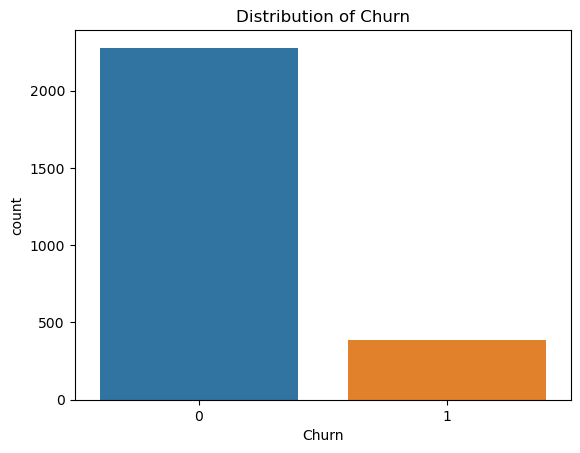

In [12]:
# Check the distribution of variable focus 'Churn'
sns.countplot(x='Churn', data=df_train)
plt.title('Distribution of Churn')
plt.show()

- Imbalance between the number of customers leaving and not leaving =>> leading to affected customer care

# Model training and evaluation

In [13]:
# Separate features and target variable
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']
X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

In [14]:
# Standardized data
scaler = StandardScaler()
num_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
df_train[num_features] = scaler.fit_transform(df_train[num_features])
df_test[num_features] = scaler.transform(df_test[num_features])

In [15]:
# Make sure the values ​​in the set are identical
print(y_train.unique())
print(y_test.unique())

[0 1]
[0 1]


In [16]:
# Verify the target variable is binary
print("Target variable (train) type:", y_train.dtype)
print("Target variable (test) type:", y_test.dtype)

Target variable (train) type: int32
Target variable (test) type: int32


# Apply machine learning models on the original imbalanced data set

In [17]:
# Logistic Regression Training
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Random Forest Training
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [19]:
# Decision Tree Training
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [20]:
# Logistic Regression Review
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

[[565   7]
 [ 87   8]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       572
           1       0.53      0.08      0.15        95

    accuracy                           0.86       667
   macro avg       0.70      0.54      0.53       667
weighted avg       0.82      0.86      0.81       667

Accuracy: 0.8590704647676162


In [21]:
# Random Forest Review
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

[[570   2]
 [ 26  69]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       572
           1       0.97      0.73      0.83        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.96       667

Accuracy: 0.9580209895052474


In [22]:
# Decision Tree Review
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

[[546  26]
 [ 28  67]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       572
           1       0.72      0.71      0.71        95

    accuracy                           0.92       667
   macro avg       0.84      0.83      0.83       667
weighted avg       0.92      0.92      0.92       667

Accuracy: 0.9190404797601199


# Handle data imbalance

In [23]:
over_sampler = RandomOverSampler(sampling_strategy=0.5)
under_sampler = RandomUnderSampler(sampling_strategy=1)

In [24]:
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

In [25]:
df_balanced = pd.DataFrame({'Churn': y_balanced})

In [26]:
counts = df_balanced['Churn'].value_counts()
counts

Churn
0    1139
1    1139
Name: count, dtype: int64

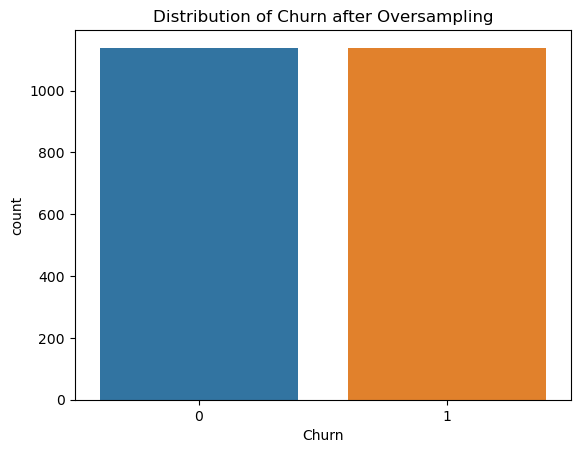

In [27]:
sns.countplot(x=y_balanced)
plt.title('Distribution of Churn after Oversampling')
plt.show()

# Select characteristic variables

['Customer service calls', 'Total day charge', 'Total day minutes', 'International plan', 'Total eve minutes']
                   Feature  Importance
17  Customer service calls    0.152093
7         Total day charge    0.131136
5        Total day minutes    0.121268
2       International plan    0.090725
8        Total eve minutes    0.055588
10        Total eve charge    0.052399
14      Total intl minutes    0.044970
16       Total intl charge    0.041790
15        Total intl calls    0.039830
13      Total night charge    0.038059
6          Total day calls    0.037072
12       Total night calls    0.036839
11     Total night minutes    0.035467
0           Account length    0.034588
9          Total eve calls    0.032581
4    Number vmail messages    0.030461
3          Voice mail plan    0.015887
1                Area code    0.009245


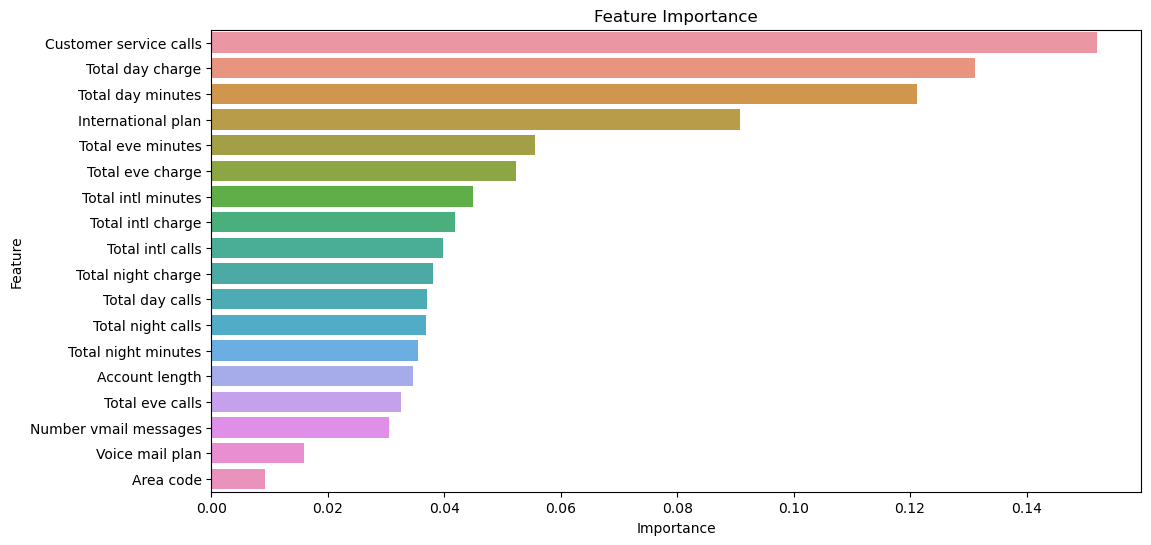

In [28]:
rf_model = RandomForestClassifier()
rf_model.fit(X_balanced, y_balanced)

# Get important variables into a data frame
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_balanced.columns,
    'Importance': feature_importances
})
# Sort variables in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_5_features_rf = feature_importance_df.head(5)['Feature'].tolist()
print(top_5_features_rf)
print(feature_importance_df)

# Plot the most important variables
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [29]:
# Important variables have been selected into the data frame
important_features = ['Customer service calls', 'Total day charge', 'Total day minutes', 'International plan', 'Total eve charge']
X_important = X_balanced[important_features]


# Use characteristic variables to apply to a machine learning model based on a balanced data set

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y_balanced, test_size=0.3, random_state=42)


AUC of Decision Tree: 0.8986
AUC of Logistic Regression: 0.8168
AUC of Random Forest: 0.9779


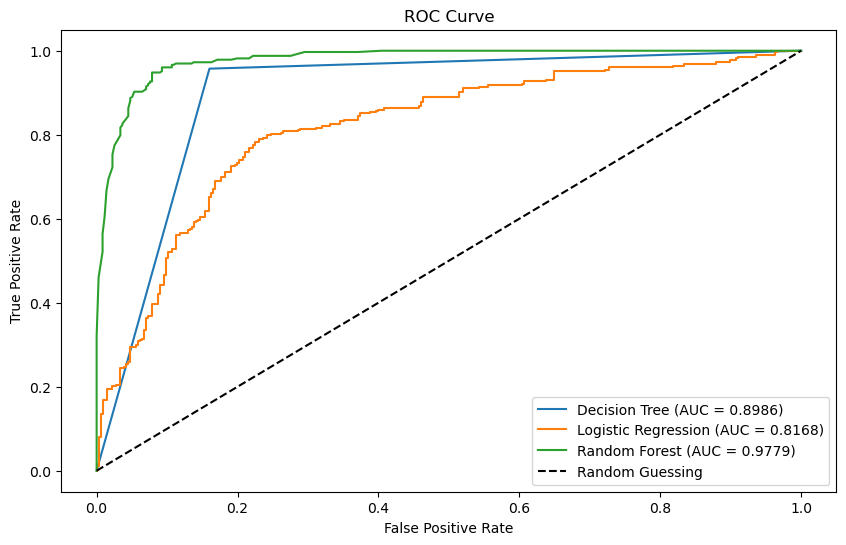

In [31]:
# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the models
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Probability prediction
y_pred_dt = dt_model.predict_proba(X_test)[:, 1]
y_pred_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

# AUC
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_lr = roc_auc_score(y_test, y_pred_lr)
auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"AUC of Decision Tree: {auc_dt:.4f}")
print(f"AUC of Logistic Regression: {auc_lr:.4f}")
print(f"AUC of Random Forest: {auc_rf:.4f}")

# Draw ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.4f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Confusion Matrix of Random Forest:
[[1104   35]
 [  13 1126]]


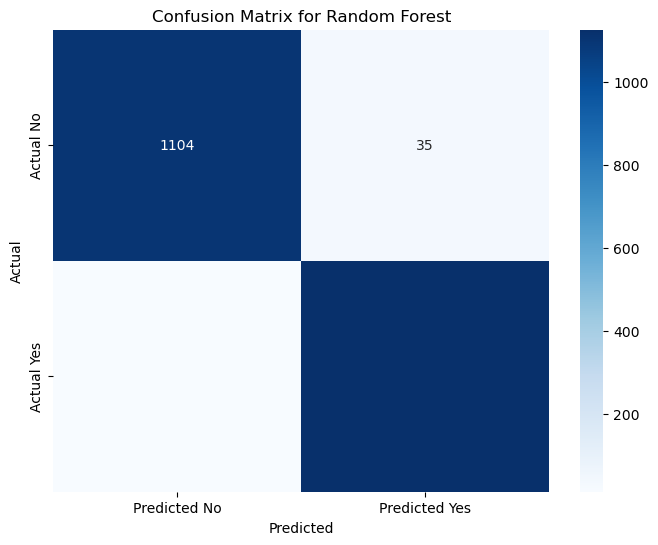

In [32]:
cm_rf = confusion_matrix(y_balanced, rf_model.predict(X_important))
print("Confusion Matrix of Random Forest:")
print(cm_rf)

# # Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()